In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import os

/home/duyle/Rice_photos/results/test_old_BC-15.csv
/home/duyle/Rice_photos/results/test_old_Huongthom.csv
/home/duyle/Rice_photos/results/test_old_Nep87.csv
/home/duyle/Rice_photos/results/test_old_Q5.csv
/home/duyle/Rice_photos/results/test_old_Xi23.csv
/home/duyle/Rice_photos/results/test_old_Thien_uu.csv


/tmp/ipykernel_583029/1774282882.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')


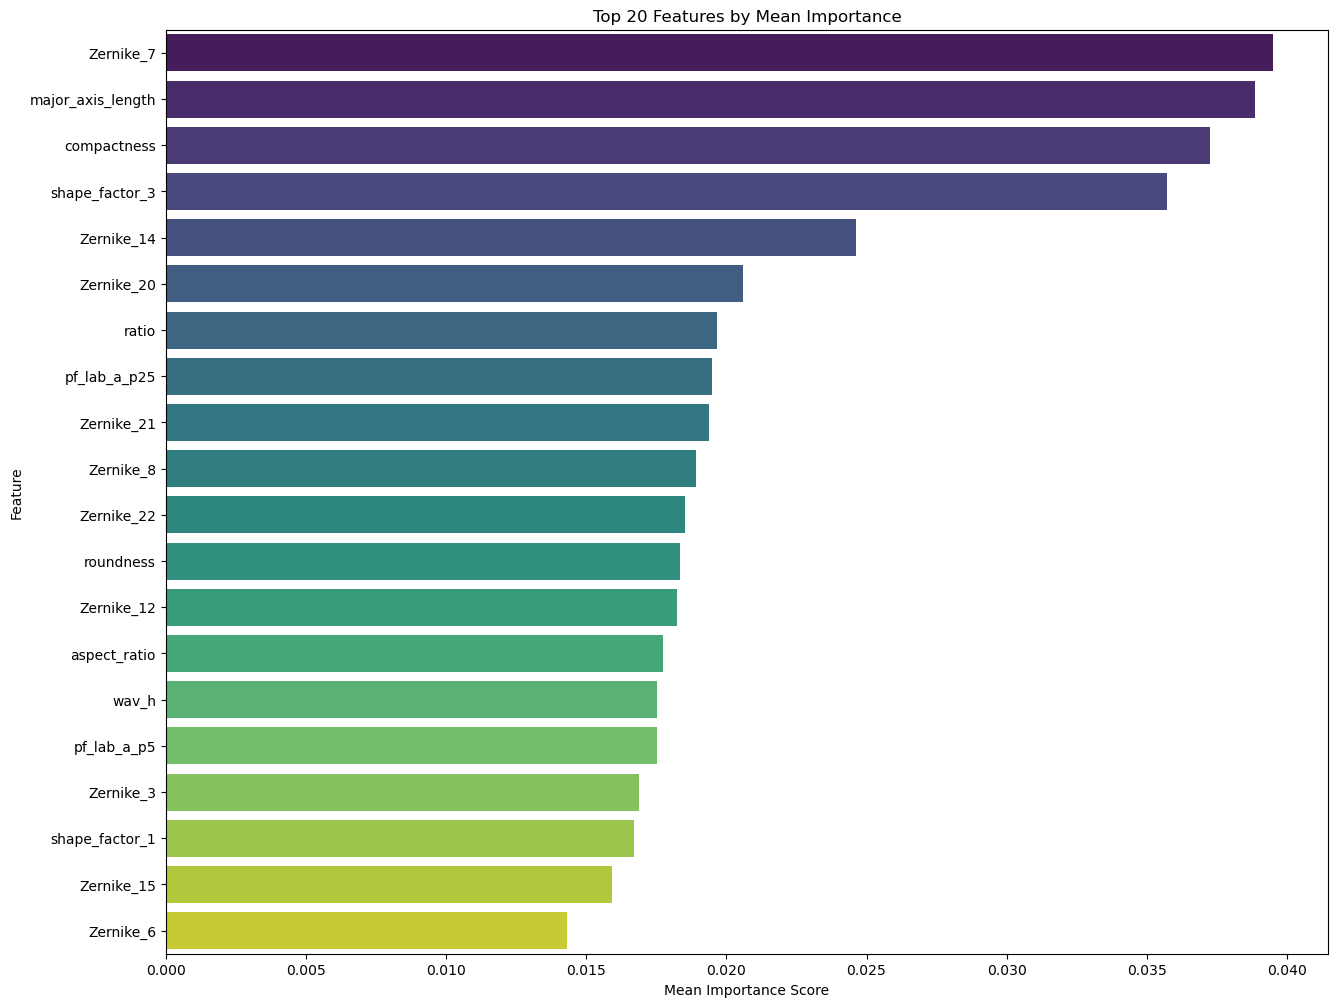

In [ ]:

# Define the directory containing the CSV files
# directory = '/home/duyle/Rice_photos/features_extracted/moments'
directory = '/home/duyle/Rice_photos/results'
res = {}

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Split features and target variable
        X = df.iloc[:, :-1]  # Features
        y = df.iloc[:, -1]   # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Train the Random Forest Classifier
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Store feature importances
        importances = rf.feature_importances_
        feature_names = X.columns
        
        # Store as a DataFrame
        for i, feature in enumerate(feature_names):
            res[feature] = res.get(feature, 0) + importances[i]  # Accumulate importance scores

# Convert the result to a DataFrame
importance_df = pd.DataFrame(list(res.items()), columns=['Feature', 'Total_Importance'])

# Calculate mean and standard deviation
importance_df['mean_importance'] = importance_df['Total_Importance'] / len(os.listdir(directory))
importance_df['std_importance'] = importance_df['Total_Importance'].std()  # Not necessary for mean importance

# Select the top N features based on mean importance
top_n = 20  # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

# Plotting the top features
plt.figure(figsize=(15, 12))
sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')
plt.title('Top 20 Features by Mean Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_300493/3899007768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')


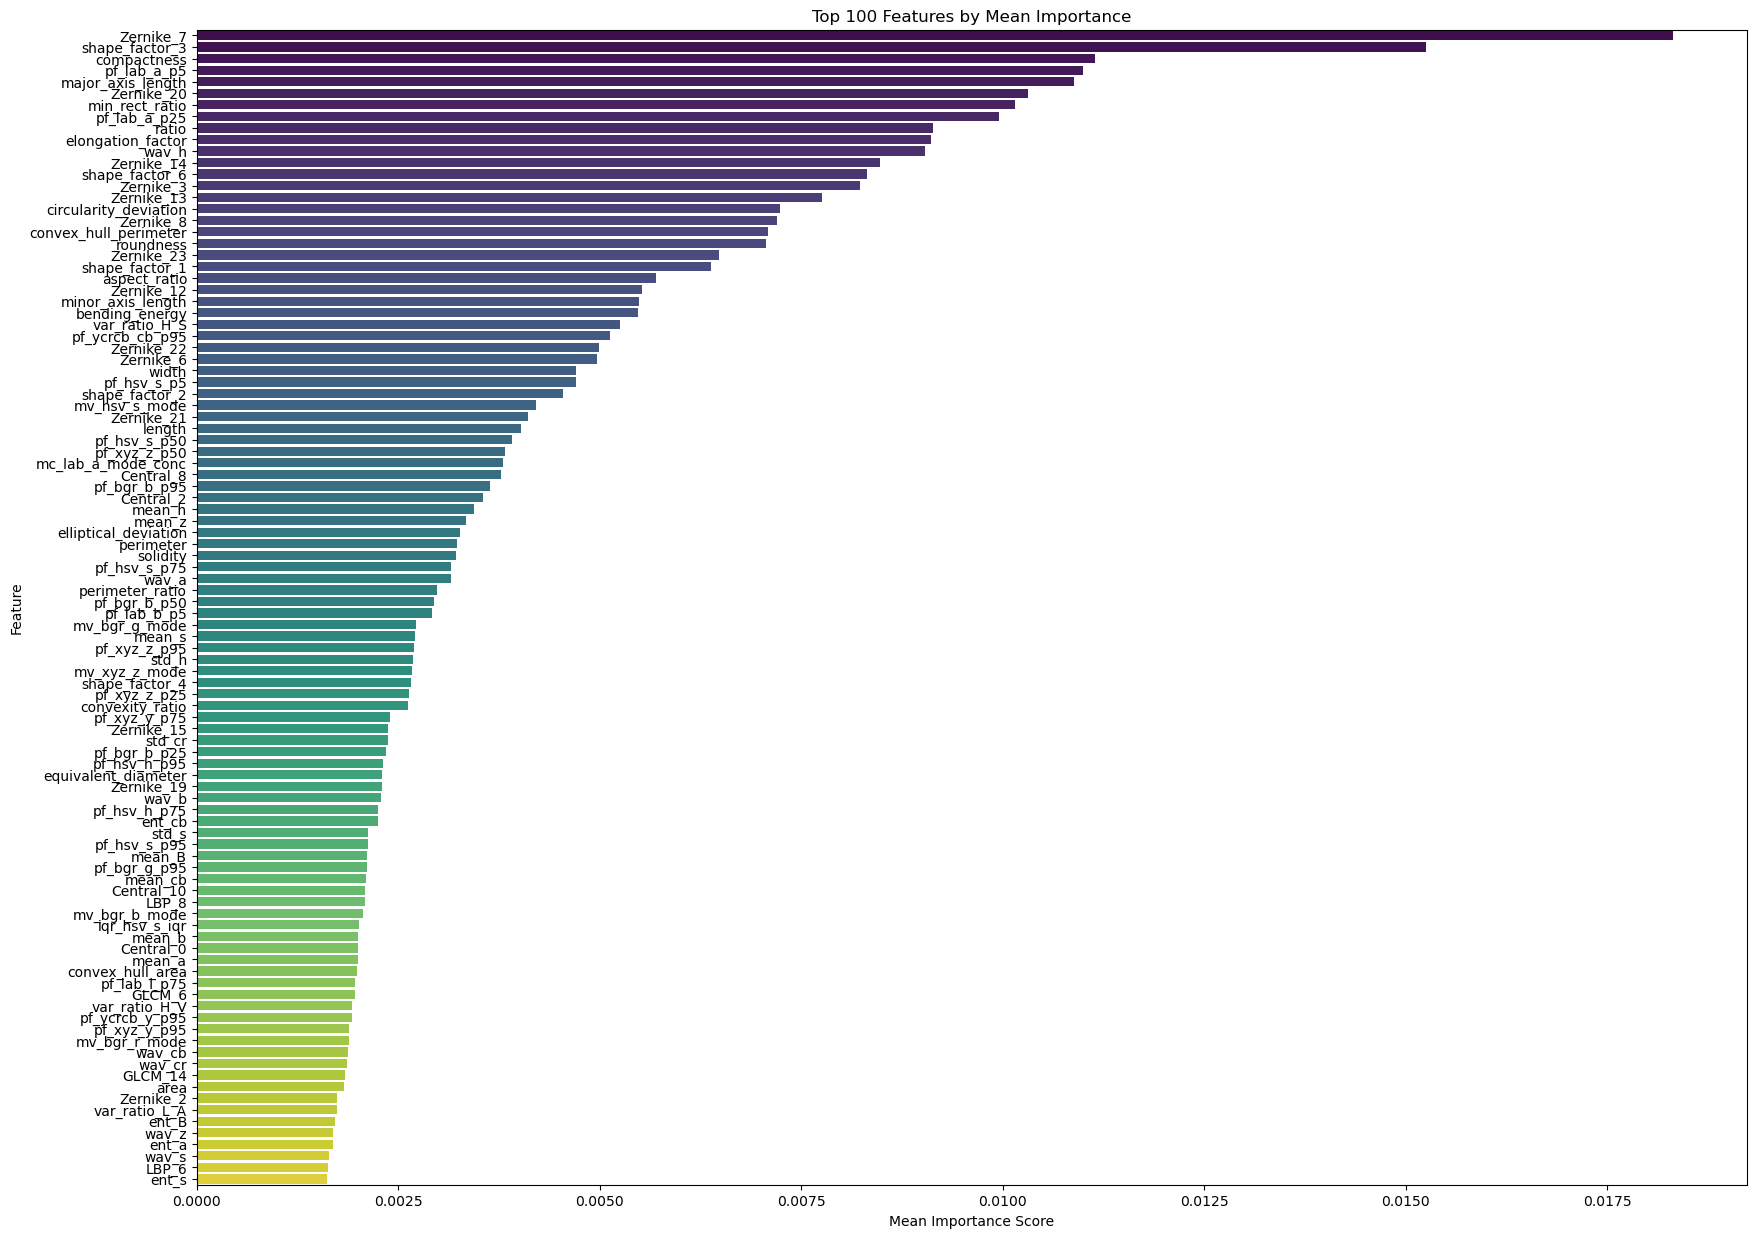

In [ ]:
top_n = 100  # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

# Plotting the top features
plt.figure(figsize=(20, 15))
sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')
plt.title('Top 100 Features by Mean Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()

In [53]:
top_n = 70  # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

In [54]:
global_features['Feature']
top100 = []
for i in global_features['Feature']:
    top100.append(i)

In [ ]:

basic_features = ["area", "length", "width", "ratio", "major_axis_length", "minor_axis_length", "convex_hull_area",
                  "convex_hull_perimeter","texture_mean", "shape_factor_1","shape_factor_2","shape_factor_3","shape_factor_4",
                  "equivalent_diameter","aspect_ratio", "perimeter","roundness","compactness","solidity",
                  "texture_std","texture_uniformity","texture_third_moment"]
test_features = ["perimeter_ratio","shape_factor_6",
        "elongation_factor",
        "elliptical_deviation",
        "bending_energy",
        "circularity_deviation",]
        # "relative_max_thickness"]
# # "red_sqr", "green_sqr", "blue_sqr",'l_sqr','a_sqr','b_lab_sqr','y_sqr','cr_sqr','cb_sqr','hue_sqr','sat_sqr',
# # 'val_sqr',
pf = [col for col in df.columns if col.startswith("pf_")]
var = [col for col in df.columns if col.startswith("var_")]
mv = [col for col in df.columns if col.startswith("mv_")]
mc = [col for col in df.columns if col.startswith("mc_")]
iqr = [col for col in df.columns if col.startswith("iqr")]
range = [col for col in df.columns if col.startswith("range")]

enhanced_color_features = ["mean_r", "mean_g", "mean_B",
            # "sqrt_r": sqrt_R, "sqrt_g": sqrt_G, "sqrt_B": sqrt_B,
            "std_r", "std_g", "std_B",
            "skew_r", "skew_g", "skew_B",
            "kur_r", "kur_g", "kur_B",
            "ent_r", "ent_g", "ent_B",
            "wav_r", "wav_g", "wav_B",
            
            "mean_h", "mean_s", "mean_v",
            "std_h", "std_s", "std_v",
            # "sqrt_h": sqrt_h, "sqrt_s": sqrt_s, "sqrt_v": sqrt_v,
            "skew_h", "skew_s", "skew_v",
            "kur_h", "kur_s", "kur_v",
            "ent_h", "ent_s", "ent_v",
            "wav_h", "wav_s", "wav_v",
            
            "mean_l", "mean_a", "mean_b",
            "std_l", "std_a", "std_b",
            # "sqrt_l": sqrt_l, "sqrt_a": sqrt_a, "sqrt_b": sqrt_b,
            "skew_l", "skew_a", "skew_b",6
            "kur_l", "kur_a", "kur_b",
            "ent_l", "ent_a", "ent_b",
            "wav_l", "wav_a", "wav_b",
            
            "mean_y", "mean_cb", "mean_cr",
            "std_y", "std_cb", "std_cr",
            # "sqrt_y": sqrt_y, "sqrt_cb": sqrt_cb, "sqrt_cr": sqrt_cr,
            "skew_y", "skew_cb", "skew_cr",
            "kur_y", "kur_cb", "kur_cr",
            "ent_y", "ent_cb", "ent_cr",
            "wav_y", "wav_cb", "wav_cr",
            
            "mean_x", "mean_Y", "mean_z",
            "std_x", "std_Y", "std_z",
            "skew_x", "skew_Y", "skew_z",
            "kur_x", "kur_Y", "kur_z",
            "ent_x", "ent_Y", "ent_z",
            "wav_x", "wav_Y","wav_z"
]  #51


zernike_features = [col for col in df.columns if col.startswith("zernike_")]
lbp_features = [col for col in df.columns if col.startswith("LBP_")]
glcm_features = [col for col in df.columns if col.startswith("GLCM_")]
# edge_features = [col for col in df.columns if col.startswith("edge_energy")]
# edge_features_2 = [col for col in df.columns if col.startswith("edge_energy_2")]
 
contour = [col for col in df.columns if col.startswith("contour_")]

In [ ]:
feature_groups = {
    "Basic": basic_features,#12
    "Enhanced Color": enhanced_color_features,#51 
    # "Skewness and Kurtosis": skew_and_kurtosis,
    "Zernike moments": zernike_features,#25
    # "Hu moments": hu_features,
    "LBP": lbp_features,#10
    "GLCM": glcm_features,#16
    # "GIST": gist_features,
    "Edge":edge_features,#4
    "Edge2": edge_features_2,#10

}

In [ ]:
feature_combinations = []
for r in range(3, len(feature_groups) + 1):  # From 1 feature group up to all
    for combo in combinations(feature_groups.keys(), r):
        feature_combinations.append(combo)

In [42]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=21),
    "Support Vector Machine": SVC(kernel='rbf', gamma = "auto", C=2),
    # "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=20)
    
}

In [ ]:
param_distributions = {
    "K-Nearest Neighbors": {
        "n_neighbors": np.arange(1, 70, 2),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Support Vector Machine": {
        "C": np.logspace(-3, 2, 10),
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto"]
    },
    "Random Forest": {
        "n_estimators": [100, 150, 200, 250, 300],
        "max_depth": [20, 30, 50, 40, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    }
}

# Define base models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

In [43]:
all_results = []

In [55]:
# df=pd.read_csv(f'/home/duyle/Rice_photos/results/test_old_BC-15.csv')
# all_results = []
directory = '/home/duyle/Rice_photos/results'
all_results = []
# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
# # Ensure 'Label' column is included
# for feature_combo in tqdm.tqdm(feature_combinations,'Choosing cominations of features..'):
#     selected_features = []
    
#     # Combine selected feature groups
#     for group in feature_combo:
#         selected_features.extend(feature_groups[group])

    df = pd.read_csv(file_path)
    df_selected = df[top100 + ["Label"]]
    X = df_selected.drop(columns=['Label'])
    y = df_selected['Label']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)



    for name, model in tqdm.tqdm(models.items(), 'Training models..'):
        # print(f"🚀 Training {name} on {feature_combo}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(cv_scores)
        all_results.append({
            "Model": name,
            "Dataset": file_path,
            # "Feature Combination": "+".join(feature_combo),
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision,4),
            "Recall": round(recall,4),
            "F1 Score": round(f1,4),
            "CV_scores(5fold)": round(np.mean(cv_scores),4)
        })
    
results_df = pd.DataFrame(all_results)
results_df 


/home/duyle/Rice_photos/results/test_old_BC-15.csv


Training models..:  50%|█████     | 1/2 [00:00<00:00,  8.99it/s]

[0.9168357  0.9127789  0.93711968 0.91463415 0.92276423]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

[0.92900609 0.93711968 0.94117647 0.93292683 0.94512195]
/home/duyle/Rice_photos/results/test_old_Huongthom.csv



Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.97302158 0.96043165 0.97482014 0.98381295 0.98021583]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]


[0.98561151 0.98381295 0.98920863 0.99280576 0.99100719]
/home/duyle/Rice_photos/results/test_old_Nep87.csv


Training models..: 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

[0.98701299 0.97662338 0.97662338 0.97662338 0.98958333]
[0.98961039 0.99220779 0.98701299 0.98961039 0.98177083]
/home/duyle/Rice_photos/results/test_old_Q5.csv



Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.96782178 0.95037221 0.95781638 0.9528536  0.95533499]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

[0.98019802 0.97766749 0.98511166 0.97766749 0.99007444]
/home/duyle/Rice_photos/results/test_old_Xi23.csv



Training models..:  50%|█████     | 1/2 [00:00<00:00,  9.76it/s]

[0.97841727 0.97482014 0.95495495 0.97117117 0.98198198]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


[0.98741007 0.99100719 0.97297297 0.97837838 0.98738739]
/home/duyle/Rice_photos/results/test_old_Thien_uu.csv


Training models..: 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

[0.99628253 0.98884758 0.98884758 0.98141264 0.98880597]
[0.99256506 0.98513011 0.98884758 0.98884758 0.99626866]


,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9333,0.9346,0.9333,0.9332,0.9208
1,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9514,0.9514,0.9514,0.9514,0.9371
2,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Huong...,0.9832,0.9836,0.9832,0.9832,0.9745
3,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Huong...,0.9927,0.9927,0.9927,0.9927,0.9885
4,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9842,0.9844,0.9842,0.9842,0.9813
5,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9916,0.9916,0.9916,0.9916,0.9880
6,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9618,0.9633,0.9618,0.9618,0.9568
7,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9859,0.9861,0.9859,0.9859,0.9821
8,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Xi23.csv,0.9627,0.9640,0.9627,0.9627,0.9723
9,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Xi23.csv,0.9810,0.9811,0.9810,0.9810,0.9834


In [56]:
results_df[results_df['Model'] == 'Support Vector Machine'].sort_values('CV_scores(5fold)', ascending=False)

,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
11,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Thien...,0.9864,0.9864,0.9864,0.9864,0.9903
3,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Huong...,0.9927,0.9927,0.9927,0.9927,0.9885
5,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9916,0.9916,0.9916,0.9916,0.9880
9,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Xi23.csv,0.9810,0.9811,0.9810,0.9810,0.9834
7,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9859,0.9861,0.9859,0.9859,0.9821
1,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9514,0.9514,0.9514,0.9514,0.9371


In [29]:
results_df = pd.DataFrame(all_results)
results_df 

,Model,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,0.8174,0.8352,0.8174,0.8155,0.7994
1,Support Vector Machine,0.8860,0.8860,0.8860,0.8860,0.8812
2,Random Forest,0.8744,0.8746,0.8744,0.8744,0.8703


In [30]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,0.8174,0.8352,0.8174,0.8155,0.7994
1,Support Vector Machine,0.8860,0.8860,0.8860,0.8860,0.8812
2,Random Forest,0.8744,0.8746,0.8744,0.8744,0.8703


In [85]:
results_df['Dataset'] = results_df['Dataset'].replace('Nep-87','Thien_uu-8')

In [86]:
results_df

,Model,Dataset,Feature Combination,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,Thien_uu-8,Basic+Enhanced Color+Skewness and Kurtosis,0.9179,0.9198,0.9179,0.9178,0.9191
1,Support Vector Machine,Thien_uu-8,Basic+Enhanced Color+Skewness and Kurtosis,0.9582,0.9583,0.9582,0.9582,0.9517
2,Random Forest,Thien_uu-8,Basic+Enhanced Color+Skewness and Kurtosis,0.9265,0.9265,0.9265,0.9265,0.9475
3,K-Nearest Neighbors,Thien_uu-8,Basic+Enhanced Color+Zernike moments,0.9496,0.9505,0.9496,0.9496,0.9574
4,Support Vector Machine,Thien_uu-8,Basic+Enhanced Color+Zernike moments,0.9625,0.9625,0.9625,0.9625,0.9695
...,...,...,...,...,...,...,...,...
652,Support Vector Machine,Thien_uu-8,Enhanced Color+Skewness and Kurtosis+Zernike m...,0.9640,0.9640,0.9640,0.9640,0.9666
653,Random Forest,Thien_uu-8,Enhanced Color+Skewness and Kurtosis+Zernike m...,0.9510,0.9511,0.9510,0.9510,0.9588
654,K-Nearest Neighbors,Thien_uu-8,Basic+Enhanced Color+Skewness and Kurtosis+Zer...,0.9496,0.9502,0.9496,0.9496,0.9553
655,Support Vector Machine,Thien_uu-8,Basic+Enhanced Color+Skewness and Kurtosis+Zer...,0.9640,0.9640,0.9640,0.9640,0.9688


In [91]:
results_df.to_csv('new_data_test_Xi-23.csv', index=False)

In [56]:
results_df

,Model,Dataset,Feature Combination,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,Q-5,Basic+Enhanced Color+Skewness and Kurtosis,0.8971,0.9009,0.8971,0.8970,0.8880
1,Support Vector Machine,Q-5,Basic+Enhanced Color+Skewness and Kurtosis,0.9355,0.9355,0.9355,0.9355,0.9315
2,Random Forest,Q-5,Basic+Enhanced Color+Skewness and Kurtosis,0.9293,0.9294,0.9293,0.9293,0.9201
3,K-Nearest Neighbors,Q-5,Basic+Enhanced Color+Zernike moments,0.9355,0.9369,0.9355,0.9355,0.9220
4,Support Vector Machine,Q-5,Basic+Enhanced Color+Zernike moments,0.9493,0.9494,0.9493,0.9493,0.9394
...,...,...,...,...,...,...,...,...
652,Support Vector Machine,Q-5,Enhanced Color+Skewness and Kurtosis+Zernike m...,0.9485,0.9486,0.9485,0.9485,0.9410
653,Random Forest,Q-5,Enhanced Color+Skewness and Kurtosis+Zernike m...,0.9178,0.9178,0.9178,0.9178,0.9217
654,K-Nearest Neighbors,Q-5,Basic+Enhanced Color+Skewness and Kurtosis+Zer...,0.9224,0.9266,0.9224,0.9223,0.9095
655,Support Vector Machine,Q-5,Basic+Enhanced Color+Skewness and Kurtosis+Zer...,0.9524,0.9524,0.9524,0.9524,0.9432


In [12]:
for data in datasets:
    df=pd.read_csv(f'/home/duyle/Rice_photos/features_extracted/moments/all_with_zernike_pluscolor_enahnced_{data}.csv')
    for feature_combo in feature_combinations:
        selected_features = []
        
        # Combine selected feature groups
        for group in feature_combo:
            selected_features.extend(feature_groups[group])

        # Ensure 'Label' column is included
        df_selected = df[selected_features + ["Label"]]

        X = df_selected.drop(columns=['Label'])
        y = df_selected['Label']

        # Normalize the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)


        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

            all_results.append({
                "Model": name,
                "Dataset": data,
                "Feature Combination": "+".join(feature_combo),
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1 Score": f1,
                "CV_scores(5fold)": np.mean(cv_scores)
            })





In [13]:
res_df = pd.DataFrame(all_results)
res_df

,Model,Dataset,Feature Combination,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,BC-15,Basic,0.851730,0.864166,0.851730,0.850480,0.845304
1,Support Vector Machine,BC-15,Basic,0.902801,0.908246,0.902801,0.902486,0.895244
2,Random Forest,BC-15,Basic,0.876442,0.880430,0.876442,0.876129,0.862767
3,K-Nearest Neighbors,BC-15,Enhanced Color,0.742998,0.743057,0.742998,0.742977,0.744211
4,Support Vector Machine,BC-15,Enhanced Color,0.784185,0.784445,0.784185,0.784142,0.792536
...,...,...,...,...,...,...,...,...
1129,Support Vector Machine,Xi23,Enhanced Color+Zernike moments+LBP+GLCM+GIST,0.924708,0.925240,0.924708,0.924553,0.924746
1130,Random Forest,Xi23,Enhanced Color+Zernike moments+LBP+GLCM+GIST,0.919591,0.919725,0.919591,0.919497,0.912134
1131,K-Nearest Neighbors,Xi23,Basic+Enhanced Color+Zernike moments+LBP+GLCM+...,0.845760,0.859580,0.845760,0.842777,0.847668
1132,Support Vector Machine,Xi23,Basic+Enhanced Color+Zernike moments+LBP+GLCM+...,0.929825,0.930104,0.929825,0.929721,0.929424


In [14]:
res_df.to_csv('tested_all_2.csv',index=False)

In [45]:
res_df.to_csv('tested_all.csv',index=False)

In [31]:
res_df = pd.DataFrame(results)
res_df

,Model,Dataset,Features,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,BC-15,zernike+basic,0.891269,0.900086,0.891269,0.890681,0.897686
1,Support Vector Machine,BC-15,zernike+basic,0.937397,0.938473,0.937397,0.937361,0.937879
2,Random Forest,BC-15,zernike+basic,0.910214,0.911438,0.910214,0.910152,0.917978
3,K-Nearest Neighbors,Huongthom,zernike+basic,0.948175,0.948379,0.948175,0.948163,0.950360
4,Support Vector Machine,Huongthom,zernike+basic,0.975912,0.975936,0.975912,0.975911,0.977338
5,Random Forest,Huongthom,zernike+basic,0.957664,0.957992,0.957664,0.957663,0.965468
6,K-Nearest Neighbors,Nep87,zernike+basic,0.983140,0.983346,0.983140,0.983134,0.976614
7,Support Vector Machine,Nep87,zernike+basic,0.986301,0.986658,0.986301,0.986294,0.984924
8,Random Forest,Nep87,zernike+basic,0.984194,0.984361,0.984194,0.984189,0.977650
9,K-Nearest Neighbors,Q5,zernike+basic,0.945674,0.949507,0.945674,0.945547,0.941971


In [32]:
res_df.to_csv('testwithcolorenhanced.csv',index=False)

In [11]:
res_df = pd.DataFrame(results)
res_df

,Model,Dataset,Features,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,BC-15,zernike+basic,0.878089,0.887406,0.878089,0.877369,0.874544
1,Support Vector Machine,BC-15,zernike+basic,0.924217,0.925406,0.924217,0.924168,0.928538
2,Random Forest,BC-15,zernike+basic,0.889621,0.892516,0.889621,0.889426,0.882663
3,K-Nearest Neighbors,Huongthom,zernike+basic,0.912409,0.913634,0.912409,0.912316,0.909712
4,Support Vector Machine,Huongthom,zernike+basic,0.946715,0.946800,0.946715,0.946717,0.955036
5,Random Forest,Huongthom,zernike+basic,0.916058,0.916557,0.916058,0.916049,0.923381
6,K-Nearest Neighbors,Nep87,zernike+basic,0.977871,0.978033,0.977871,0.977864,0.974014
7,Support Vector Machine,Nep87,zernike+basic,0.987355,0.987565,0.987355,0.987350,0.981807
8,Random Forest,Nep87,zernike+basic,0.983140,0.983346,0.983140,0.983134,0.975054
9,K-Nearest Neighbors,Q5,zernike+basic,0.931590,0.935630,0.931590,0.931416,0.935023


In [17]:
res_df.to_csv('testwithoutcolor.csv',index=False)

In [9]:
res_df = pd.DataFrame(results)
res_df

,Model,Features,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,zernike+basic,0.860791,0.872848,0.860791,0.859681,0.875346
1,Support Vector Machine,zernike+basic,0.887150,0.893173,0.887150,0.886729,0.898084
2,Random Forest,zernike+basic,0.910214,0.912916,0.910214,0.910074,0.909044


In [68]:
df

,Model,Dataset,Features,Accuracy,Precision,Recall,F1 Score
0,KNN,BC15,basic,0.8402,0.8466,0.8402,0.8395
1,SVM,BC15,basic,0.8987,0.9039,0.8987,0.8984
2,Random Forest,BC15,basic,0.8526,0.8543,0.8526,0.8524
3,KNN,BC15,gist,0.6367,0.6368,0.6367,0.6367
4,SVM,BC15,gist,0.6960,0.6963,0.6960,0.6959
...,...,...,...,...,...,...,...
67,SVM,Xi23,glcm,0.7727,0.7786,0.7727,0.7693
68,Random Forest,Xi23,glcm,0.7580,0.7579,0.7580,0.7580
69,KNN,Xi23,lbp,0.6681,0.6676,0.6681,0.6653
70,SVM,Xi23,lbp,0.6886,0.6896,0.6886,0.6848


In [53]:
df = pd.DataFrame(results)


In [57]:
df = df.round(4)

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [74]:
df

,Model,Dataset,Features,Accuracy,Precision,Recall,F1 Score
0,KNN,BC15,basic,0.8402,0.8466,0.8402,0.8395
1,SVM,BC15,basic,0.8987,0.9039,0.8987,0.8984
2,Random Forest,BC15,basic,0.8526,0.8543,0.8526,0.8524
3,KNN,BC15,gist,0.6367,0.6368,0.6367,0.6367
4,SVM,BC15,gist,0.6960,0.6963,0.6960,0.6959
5,Random Forest,BC15,gist,0.7702,0.7707,0.7702,0.7701
6,KNN,BC15,glcm,0.6738,0.6766,0.6738,0.6726
7,SVM,BC15,glcm,0.7512,0.7512,0.7512,0.7512
8,Random Forest,BC15,glcm,0.7166,0.7167,0.7166,0.7166
9,KNN,BC15,lbp,0.5568,0.5570,0.5568,0.5567


In [76]:
df[df[Features == 'basic']]

NameError: name 'Features' is not defined

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df)

ValueError: Value must be a nonnegative integer or None

In [59]:
df.to_csv('results.csv',index=False)